<a href="https://colab.research.google.com/github/greennam/MyGit/blob/master/8_2_k_%ED%8F%89%EA%B7%A0_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


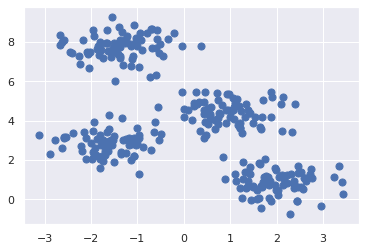

In [7]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [8]:
# call model class
from sklearn.cluster import KMeans

In [11]:
# Creat model instance and then set hyper-parameter
kmeans = KMeans(n_clusters=4) # 중심점의 개수를 설정하는 초모수 Hyper-parameter
# 군집 중심의 수를 변경하면서 최적의 군집을 만드는 군집 중심수를 찾음

In [13]:
# 모델 적합
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
# 모델 적용 (예측)
y_kmeans = kmeans.predict(X)

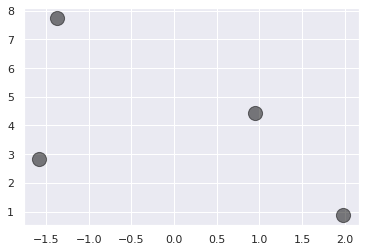

In [16]:
# 군집 중심 시각화
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5 )


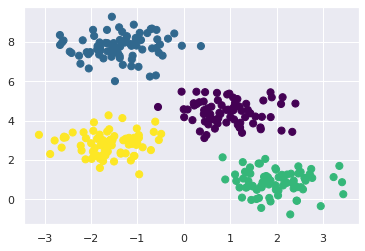

In [17]:
# Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s = 50, cmap='viridis')

In [ ]:
# 원리, 기댓값-최대화 (Expectation-Maximization, E-M)
# 군집 중심을 임의로 추측 > 수렴할때까지 기댓값을 가까운 군집 중심에 할당 
# > 최대화 단계 > 수렴된 군집의 중심을 기준으로 군집을 할당

In [27]:
# 실습 : 손으로 쓴 숫자 데이터 분석
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
ax

In [30]:
# 수기 숫자 데이터 시각화
for i in range(3):
  for j in range(5):
    ax[i][j].axis('off')
    ax[i][j].imshow(digits.data[i*4+j].reshape(8,8), cmap='binary')

KeyError: ignored